<a href="https://colab.research.google.com/github/seyonechithrananda/ncov-ligand-protein/blob/master/DeepChem_balanced_ligand_protein_RF_classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Get DeepChem + RDKit working in Colab using wget and some bash commands

In [0]:
!wget -c https://repo.anaconda.com/miniconda/Miniconda3-latest-Linux-x86_64.sh
!chmod +x Miniconda3-latest-Linux-x86_64.sh
!bash ./Miniconda3-latest-Linux-x86_64.sh -b -f -p /usr/local
!conda install -y -c deepchem -c rdkit -c conda-forge -c omnia deepchem-gpu=2.3.0
import sys
sys.path.append('/usr/local/lib/python3.7/site-packages/')


--2020-04-26 02:07:03--  https://repo.anaconda.com/miniconda/Miniconda3-latest-Linux-x86_64.sh
Resolving repo.anaconda.com (repo.anaconda.com)... 104.16.131.3, 104.16.130.3, 2606:4700::6810:8203, ...
Connecting to repo.anaconda.com (repo.anaconda.com)|104.16.131.3|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 85055499 (81M) [application/x-sh]
Saving to: ‘Miniconda3-latest-Linux-x86_64.sh’

Miniconda3-latest-L 100%[===================>]  81.12M   191MB/s    in 0.4s    

2020-04-26 02:07:04 (191 MB/s) - ‘Miniconda3-latest-Linux-x86_64.sh’ saved [85055499/85055499]

PREFIX=/usr/local
Unpacking payload ...
Solving environment: - done

## Package Plan ##

  environment location: /usr/local

  added / updated specs:
    - _libgcc_mutex==0.1=main
    - asn1crypto==1.3.0=py37_0
    - ca-certificates==2020.1.1=0
    - certifi==2019.11.28=py37_0
    - cffi==1.14.0=py37h2e261b9_0
    - chardet==3.0.4=py37_1003
    - conda-package-handling==1.6.0=py37h7b6447c_0
    - 

In [0]:
import tensorflow as tf
print("tf.__version__: %s" % str(tf.__version__))
device_name = tf.test.gpu_device_name()
if not device_name:
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))


tf.__version__: 2.2.0-rc3
Found GPU at: /device:GPU:0


In [0]:
!git clone https://github.com/deepchem/deepchem.git

Cloning into 'deepchem'...
remote: Enumerating objects: 669, done.
remote: Counting objects: 100% (669/669), done.
remote: Compressing objects: 100% (445/445), done.
remote: Total 30600 (delta 374), reused 439 (delta 219), pack-reused 29931
Receiving objects: 100% (30600/30600), 437.81 MiB | 55.97 MiB/s, done.
Resolving deltas: 100% (22491/22491), done.


In [0]:
%cd deepchem/

/content/deepchem


In [0]:
!python setup.py install

     |████████████████████████████████| 110 kB 2.8 MB/s 
running install
[pbr] Writing ChangeLog
[pbr] Generating ChangeLog
[pbr] ChangeLog complete (0.1s)
[pbr] Generating AUTHORS
[pbr] AUTHORS complete (0.1s)
running build
running build_py
creating build
creating build/lib
creating build/lib/deepchem
creating build/lib/deepchem/rl
creating build/lib/deepchem/rl/envs
copying deepchem/rl/envs/test_tictactoe.py -> build/lib/deepchem/rl/envs
copying deepchem/rl/envs/__init__.py -> build/lib/deepchem/rl/envs
copying deepchem/rl/envs/tictactoe.py -> build/lib/deepchem/rl/envs
creating build/lib/deepchem/splits
creating build/lib/deepchem/splits/tests
copying deepchem/splits/tests/test_splitter.py -> build/lib/deepchem/splits/tests
copying deepchem/splits/tests/test_task_splitter.py -> build/lib/deepchem/splits/tests
copying deepchem/splits/tests/__init__.py -> build/lib/deepchem/splits/tests
creating build/lib/deepchem/molnet
copying deepchem/molnet/preset_hyper_parameters.py -> build/lib/

In [0]:
import deepchem as dc


In [0]:
!conda install pandas

Solving environment: | / - \ | / - \ | / - \ | / - \ | / - \ | / - done

## Package Plan ##

  environment location: /usr/local

  added / updated specs:
    - pandas


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    certifi-2020.4.5.1         |           py37_0         155 KB
    conda-4.8.3                |           py37_0         2.8 MB
    openssl-1.1.1g             |       h7b6447c_0         2.5 MB
    pandas-1.0.3               |   py37h0573a6f_0         8.6 MB
    ------------------------------------------------------------
                                           Total:        14.1 MB

The following packages will be SUPERSEDED by a higher-priority channel:

  ca-certificates    conda-forge::ca-certificates-2020.4.5~ --> pkgs/main::ca-certificates-2020.1.1-0
  certifi            conda-forge::certifi-2020.4.5.1-py37h~ --> pkgs/main::

In [0]:
import os 
import sys 
import pandas as pd

# train --> balanced dataset
dataset_train_file = "/content/drive/My Drive/Project De Novo/AID1706_binarized_sars_12k_samples.csv"
dataset_eval_file = "/content/drive/My Drive/Project De Novo/evaluation_set_v2_balanced - evaluation_set_v2.csv"
dataset_train = pd.read_csv(dataset_train_file)
dataset_eval = pd.read_csv(dataset_eval_file)

In [0]:
# convert SMILES to Mol + visualize as images

import tempfile
from rdkit import Chem
from rdkit.Chem import Draw
from rdkit.Chem import AllChem
from itertools import islice
from IPython.display import Image, display, HTML

def display_images(filenames):
    """Helper to pretty-print images."""
    for filename in filenames:
        display(Image(filename))

def mols_to_pngs(mols, basename="test"):
    """Helper to write RDKit mols to png files."""
    filenames = []
    for i, mol in enumerate(mols):
        filename = "BACE_%s%d.png" % (basename, i)
        Draw.MolToFile(mol, filename)
        filenames.append(filename)
        if i is 10:
          break
    return filenames

print (dataset_train.shape[0])
print (dataset_eval.shape[0])

#print (Chem.MolFromSmiles(dataset_train.shape[0]))

molecules_train_x = []
molecules_train_y = []
molecules_eval_x = []
molecules_eval_y = []

for i, data in islice(dataset_train.iterrows(), dataset_train.shape[0]):
    print (data[0])
    print (data[1])
    molecules_train_x.append(Chem.MolFromSmiles(data[0]))
    molecules_train_y.append(data[1])

for _, data in islice(dataset_eval.iterrows(), dataset_eval.shape[0]):
    print (data[0])
    print (data[1])
    molecules_eval_x.append(Chem.MolFromSmiles(data[0]))
    molecules_eval_y.append(data[1])



Streaming output truncated to the last 5000 lines.
0
CC(C)CC1=CC(=NN1)C(=O)O
0
CCSC1=NN=C(N1C)C2=CC=C(C=C2)S(=O)(=O)N3CCCC3
0
C1=CC=C(C=C1)C(=O)CNC(=O)CSC2=NC3=CC=CC=C3O2
0
CC(C)(C)C1=NC2=CC=CC=C2C(=N1)SCC(=O)NCC3=CC=CO3
0
CC1=CC(=CC=C1)C(=O)N(C)C2=NN=C(S2)C3=CC=NC=C3
0
CNC1=NC(=NC(=N1)SCC(=O)OC)N2CCOCC2
0
CCCN1C(=NN=C1SCC(=O)C2=C(C=CC(=C2)OC)OC)C(C)C
0
C1CC(N(C1)C(=O)C2=CC=C(O2)Br)(C#N)C3=CC=CC=C3
0
COC1=CC(=CC(=C1OC)OC)C(=O)N2CCCC(C2)C3=NC(=NO3)C4=CC=CS4
0
CCOC(=O)CN1C(=O)C2=C(N=C3N2CCS3)N(C1=O)C
0
C1CCN(C1)C(=O)CCC2=CC=C(C=C2)NC(=O)C3=NC=NN3
0
CCOC(=O)CC1=CC(=O)N2C(=N1)C(=C(N2)C)C3=CC=CC=C3
0
C=CCN(CC=C)C(=O)CN1C(=O)C2=CC=CC=C2C1=O
0
CC1=C(C=CC(=C1)OC)/C(=C/2\C(N(C(=O)C2=O)CCN(C)C)C3=CC(=C(C=C3)OC)OC)/O
0
CCOC1=CC=CC(=C1)/C(=C/2\C(N(C(=O)C2=O)CC3=CC=CO3)C4=CC=NC=C4)/O
0
CCCCOC1=CC=C(C=C1)NC(=O)C2=NC=C(N=C2)C
0
C1CN(C2=CC=CC=C21)S(=O)(=O)C3=CC=CS3
0
C1CCC(CC1)NC(=O)N2C3CCCC2CC(C3)NC(=O)C4=CC=CC=C4
0
C1=CC=C2C(=C1)C(=O)N(C2=O)CCCOCC3=CNC(=O)NC3=O
0
C1COC2(O1)C3=CC=CC=C3N(C2=O)CCCCN4C5

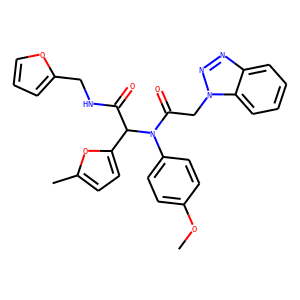

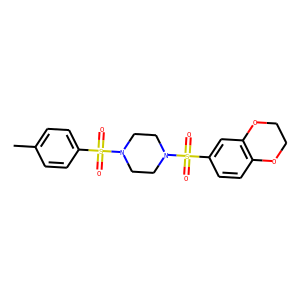

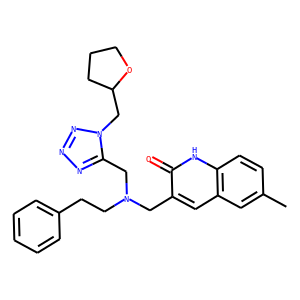

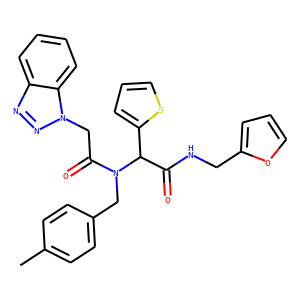

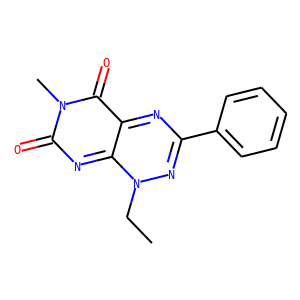

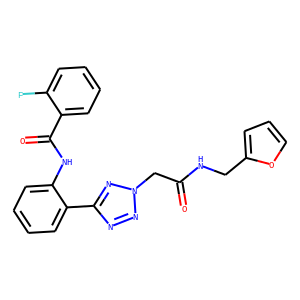

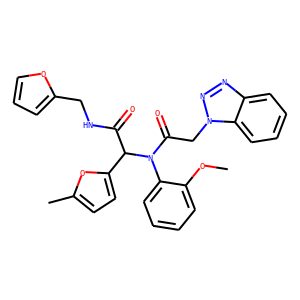

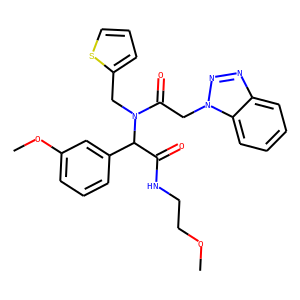

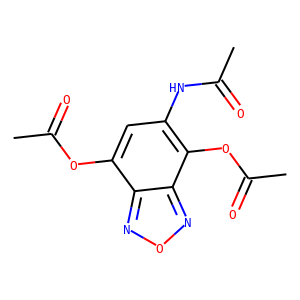

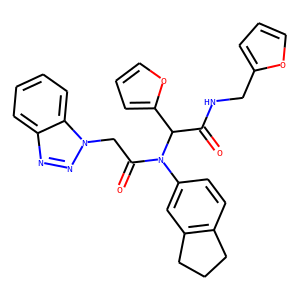

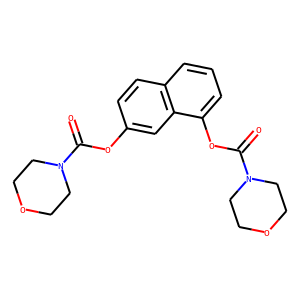

In [0]:
# Display 10 compounds from the SARS molecular assay - train
display_images(mols_to_pngs(molecules_train_x, basename="dataset"))

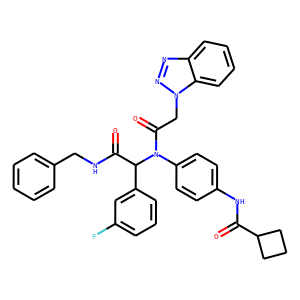

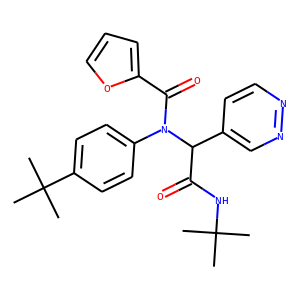

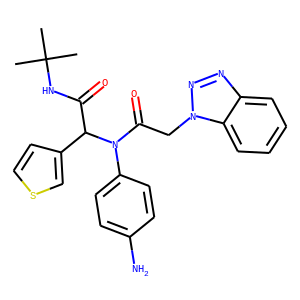

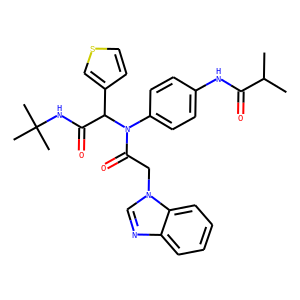

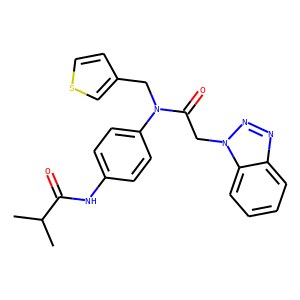

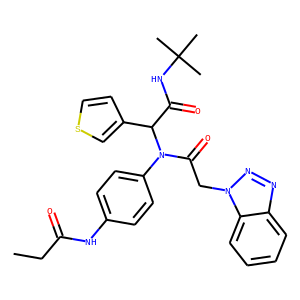

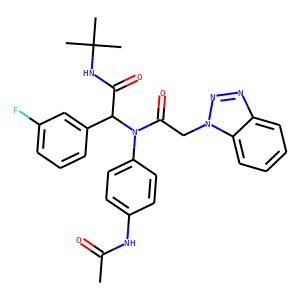

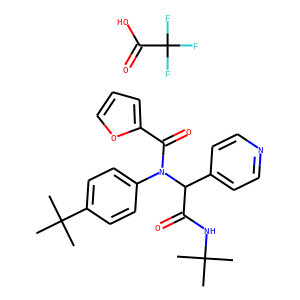

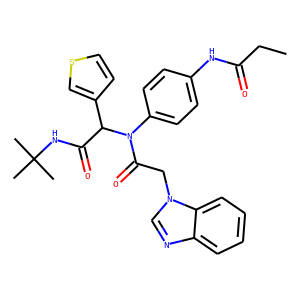

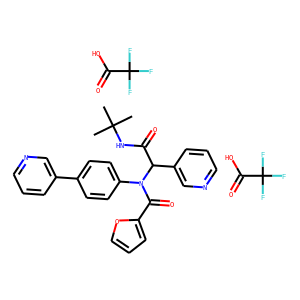

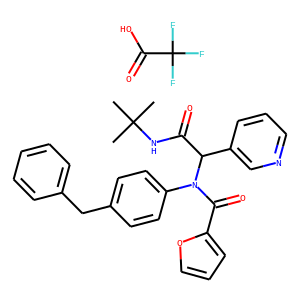

In [0]:
# Display 10 compounds from the COVID-19 molecular assay - our eval. dataset
display_images(mols_to_pngs(molecules_eval_x, basename="dataset"))


In [0]:
!conda install -c anaconda numpy

Solving environment: | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - done

## Package Plan ##

  environment location: /usr/local

  added / updated specs:
    - numpy


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    conda-4.8.3                |           py37_0         3.0 MB  anaconda
    openssl-1.1.1d             |       h7b6447c_2         3.7 MB  anaconda
    ------------------------------------------------------------
                                           Total:         6.8 MB

The following packages will be SUPERSEDED by a higher-priority channel:

  conda                                           pkgs/main --> anaconda
  openssl                                         pkgs/main --> anaconda


Proceed ([y]/n)? y


openssl-1.1.1d       | 3.7 MB    | : 100% 1.0/1 [00:00<00:00, 20.13s/it]               

In [0]:
#ensure labels + data was processed properly

print(dataset_train.shape)
print(dataset_eval.shape)

(11999, 2)
(99, 2)


In [0]:
# convert RDKit Mol object to Morgan fingerprint (bit vector representation) with radius 2
from rdkit import DataStructs
import numpy

molecules_train_x_fingerprint = []
molecules_eval_x_fingerprint = []

print (molecules_train_x[0])

for item in molecules_train_x:
    print (item)
    molecules_train_x_fingerprint.append(AllChem.GetMorganFingerprintAsBitVect(item,2))

print("MOVING TO EVAL DATASET")

for item_eval in molecules_eval_x:
    print (item_eval)
    molecules_eval_x_fingerprint.append(AllChem.GetMorganFingerprintAsBitVect(item_eval,2))


'''
for _, data in islice(molecules_train_x.iterrows(), molecules_train_x.shape[0]):
    print (data[0])
    print (data[1])
    molecules_train_x_fingerprint.append(AllChem.GetMorganFingerprintAsBitVect(molecules_train_x,2))

for _, data in islice(molecules_eval_x.iterrows(), molecules_eval_x.shape[0]):
    print (data[0])
    print (data[1])
    molecules_train_x_fingerprint.append(AllChem.GetMorganFingerprintAsBitVect(molecules_eval_x,2))


molecules_eval_x_fingerprint = AllChem.GetMorganFingerprintAsBitVect(molecules_eval_x, radius = 2, nBits=1024)
'''

Streaming output truncated to the last 5000 lines.
MOVING TO EVAL DATASET


'\nfor _, data in islice(molecules_train_x.iterrows(), molecules_train_x.shape[0]):\n    print (data[0])\n    print (data[1])\n    molecules_train_x_fingerprint.append(AllChem.GetMorganFingerprintAsBitVect(molecules_train_x,2))\n\nfor _, data in islice(molecules_eval_x.iterrows(), molecules_eval_x.shape[0]):\n    print (data[0])\n    print (data[1])\n    molecules_train_x_fingerprint.append(AllChem.GetMorganFingerprintAsBitVect(molecules_eval_x,2))\n\n\nmolecules_eval_x_fingerprint = AllChem.GetMorganFingerprintAsBitVect(molecules_eval_x, radius = 2, nBits=1024)\n'

In [0]:
# install sklearn
!conda install scikit-learn


Solving environment: | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - done

## Package Plan ##

  environment location: /usr/local

  added / updated specs:
    - scikit-learn


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    conda-4.8.3                |           py37_0         2.8 MB
    openssl-1.1.1d             |       h7b6447c_2         2.5 MB
    ------------------------------------------------------------
                                           Total:         5.3 MB

The following packages will be SUPERSEDED by a higher-priority channel:

  conda                                            anaconda --> pkgs/main
  openssl                                          anaconda --> pkgs/main


Proceed ([y]/n)? y


conda-4.8.3          | 2.8 MB    | : 100% 1.0/1 [00:00<00:00, 11.21s/it]                
openssl-1.1.1d       | 2.

In [0]:
# convert the RDKit explicit vectors into numpy arrays
np_mol_train_x = []
np_mol_eval_x = []

for mol in molecules_train_x_fingerprint:
  arr = numpy.zeros((1,))
  DataStructs.ConvertToNumpyArray(mol, arr)
  np_mol_train_x.append(arr)

for mol in molecules_eval_x_fingerprint:
  arr_2 = numpy.zeros((1,))
  DataStructs.ConvertToNumpyArray(mol, arr_2)
  print (arr_2.shape)
  np_mol_eval_x.append(arr_2)



(2048,)
(2048,)
(2048,)
(2048,)
(2048,)
(2048,)
(2048,)
(2048,)
(2048,)
(2048,)
(2048,)
(2048,)
(2048,)
(2048,)
(2048,)
(2048,)
(2048,)
(2048,)
(2048,)
(2048,)
(2048,)
(2048,)
(2048,)
(2048,)
(2048,)
(2048,)
(2048,)
(2048,)
(2048,)
(2048,)
(2048,)
(2048,)
(2048,)
(2048,)
(2048,)
(2048,)
(2048,)
(2048,)
(2048,)
(2048,)
(2048,)
(2048,)
(2048,)
(2048,)
(2048,)
(2048,)
(2048,)
(2048,)
(2048,)
(2048,)
(2048,)
(2048,)
(2048,)
(2048,)
(2048,)
(2048,)
(2048,)
(2048,)
(2048,)
(2048,)
(2048,)
(2048,)
(2048,)
(2048,)
(2048,)
(2048,)
(2048,)
(2048,)
(2048,)
(2048,)
(2048,)
(2048,)
(2048,)
(2048,)
(2048,)
(2048,)
(2048,)
(2048,)
(2048,)
(2048,)
(2048,)
(2048,)
(2048,)
(2048,)
(2048,)
(2048,)
(2048,)
(2048,)
(2048,)
(2048,)
(2048,)
(2048,)
(2048,)
(2048,)
(2048,)
(2048,)
(2048,)
(2048,)
(2048,)


In [0]:
print("Number of compounds in train set")
print(len(np_mol_train_x))
print("Number of compounds in validation set")
print(len(np_mol_eval_x))


Number of compounds in train set
11999
Number of compounds in validation set
99


In [0]:
import deepchem as dc
import tempfile, shutil

'''
Applying transformers from DeepChem to data --> 
The performance of common machine-learning algorithms can be very sensitive to preprocessing of the data. 
One common transformation applied to data is to normalize it to have zero-mean and unit-standard-deviation. 
'''

transformers = [
    dc.trans.NormalizationTransformer(transform_X=True, dataset=np_mol_train_x),
    dc.trans.ClippingTransformer(transform_X=True, dataset=np_mol_train_x)]

datasets = [np_mol_train_x, np_mol_eval_x]
for i, dataset in enumerate(datasets):
  for transformer in transformers:
      datasets[i] = transformer.transform(dataset)
np_mol_train_x, np_mol_eval_x = datasets


In [0]:
# No deepchem training operation
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100, random_state=1123)

rf.fit(np_mol_train_x, molecules_train_y)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=1123,
                       verbose=0, warm_start=False)

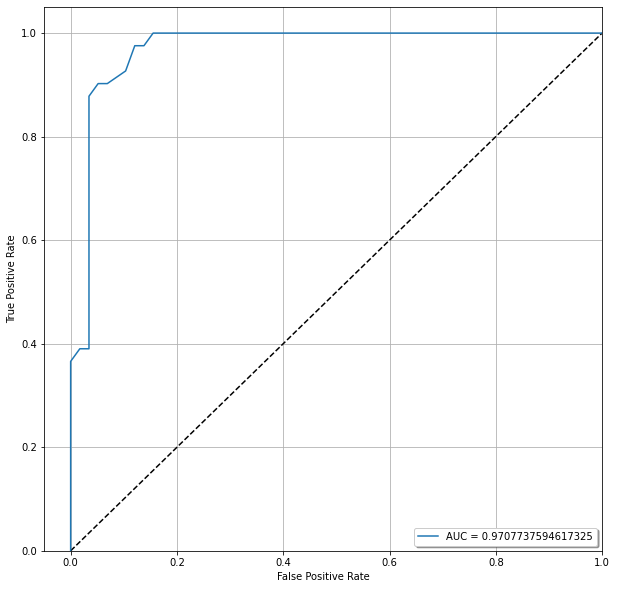

In [0]:
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# overall accuracy
acc = rf.score(np_mol_eval_x, molecules_eval_y)

# get roc/auc info
y_mol_score = rf.predict_proba(np_mol_eval_x)[:,1]

fpr = dict()
tpr = dict()
fpr, tpr, _= roc_curve(molecules_eval_y, y_mol_score)

roc_auc = dict()
roc_auc = auc(fpr, tpr)

#make plot 
plt.figure(figsize=(10,10))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([-0.05, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.grid(True)
plt.plot(fpr, tpr, label='AUC = {0}'.format(roc_auc))        
plt.legend(loc="lower right", shadow=True, fancybox =True) 
plt.show()


In [0]:
print(y_mol_score)
print(molecules_eval_y)

print(roc_auc)

[0.4  0.12 0.41 0.24 0.18 0.5  0.67 0.08 0.23 0.23 0.28 0.49 0.21 0.19
 0.46 0.41 0.26 0.51 0.17 0.24 0.23 0.4  0.48 0.48 0.21 0.24 0.73 0.19
 0.22 0.16 0.22 0.24 0.36 0.61 0.22 0.22 0.13 0.22 0.48 0.38 0.12 0.01
 0.07 0.02 0.01 0.05 0.01 0.05 0.04 0.04 0.03 0.06 0.05 0.08 0.06 0.04
 0.   0.05 0.03 0.07 0.13 0.06 0.02 0.36 0.06 0.05 0.01 0.   0.01 0.04
 0.16 0.   0.05 0.03 0.01 0.02 0.31 0.12 0.02 0.03 0.07 0.06 0.03 0.01
 0.04 0.11 0.   0.04 0.02 0.05 0.07 0.13 0.07 0.14 0.05 0.01 0.02 0.02
 0.  ]
[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
0.9707737594617325


In [0]:
print (len(np_mol_eval_x))

99


In [0]:
from sklearn import metrics

y_pred_mol = rf.predict(np_mol_eval_x)
print ("Accuracy:", metrics.accuracy_score(molecules_eval_y, y_pred_mol))

Accuracy: 0.6262626262626263


In [0]:
print(y_pred_mol)

[0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
